In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv("dataset/Social_Network_Ads.csv")

In [3]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
x = dataset[["Age", "EstimatedSalary"]]
y = dataset["Purchased"]

In [5]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [6]:
x[0]

array([-1.78179743, -1.49004624])

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

In [8]:
svm = LinearSVC()
svm.fit(x_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [9]:
y_pred = svm.predict(x_test)

In [10]:
accuracy_score(y_test, y_pred)

0.76

In [11]:
from matplotlib.colors import ListedColormap

In [12]:
startx = x_train[:,0].min() - 0.25

In [13]:
stopx = x_train[:,0].max() + 0.25

In [14]:
x1 = np.arange(startx, stopx, 0.01)

In [15]:
x1.shape

(452,)

In [16]:
starty = x_train[:,1].min() - 0.25

In [17]:
stopy = x_train[:,1].max() + 0.25

In [18]:
x2 = np.arange(starty, stopy, 0.01)

In [19]:
x2.shape

(447,)

In [20]:
xx, yy = np.meshgrid(x1,x2)

In [21]:
z = svm.predict(np.array( [xx.ravel(),yy.ravel()] ).T )

In [22]:
z = z.reshape(xx.shape)

In [23]:
z

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]])

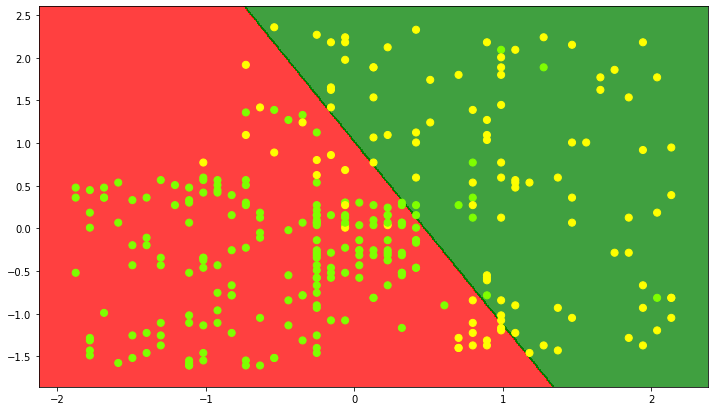

In [24]:
plt.figure(figsize=(12,7))
plt.contourf(xx,yy,z, alpha=0.75, cmap = ListedColormap(('red', 'green')))
plt.scatter(x_train[:,0], x_train[:,1], s=50, c=y_train, cmap = ListedColormap(('chartreuse', 'yellow')))